In [1]:

from io import StringIO
import requests
import json
import pandas as pd

df = pd.read_csv('data.csv')
df.head()


,Time,temperature,icon,humidity,visibility,summary,apparentTemperature,pressure,windSpeed,epochTime,windBearing,precipIntensity,dewPoint,precipProbability,Apartment1,Apartment2,Apartment3,Apartment4,Apartment5
0,01-01-15 05:00,11.94,clear-night,0.76,9.95,Clear,2.40,1020.81,5.94,1420088400,225,0.0,5.78,0.0,1.719881,2.402497,0.946612,1.558030,2.643118
1,01-01-15 06:00,13.04,clear-night,0.73,9.95,Clear,3.96,1019.65,5.72,1420092000,196,0.0,6.14,0.0,2.915711,1.921358,3.178157,2.526246,2.604114
2,01-01-15 07:00,15.46,clear-night,0.69,9.80,Clear,7.00,1019.15,5.55,1420095600,209,0.0,7.16,0.0,2.857616,0.581464,1.261038,1.479601,2.585807
3,01-01-15 08:00,16.73,clear-night,0.65,9.70,Clear,6.61,1018.56,7.56,1420099200,217,0.0,7.04,0.0,2.481967,2.820364,2.944657,1.811051,2.606847
4,01-01-15 09:00,16.96,clear-night,0.62,9.75,Clear,6.73,1018.00,7.75,1420102800,226,0.0,6.33,0.0,4.179690,3.564844,2.666994,2.125809,2.626083


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

df['Time'] = pd.to_datetime(df['Time'])
df.index = df['Time']
del df['Time']
#df.head()

In [3]:
df_M=df.resample('M', how='mean')

C:\Users\12bee\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  """Entry point for launching an IPython kernel.


In [4]:
df_May=df['2015-05']
df_May=df_May.resample('D', how='mean')

C:\Users\12bee\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  


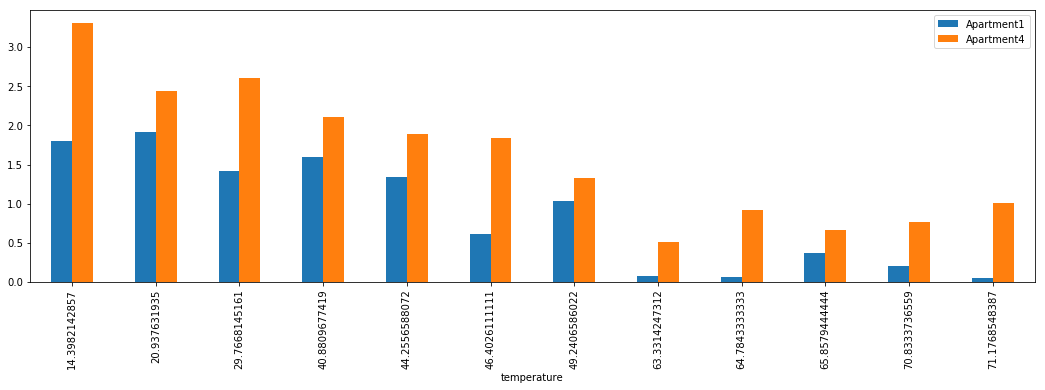

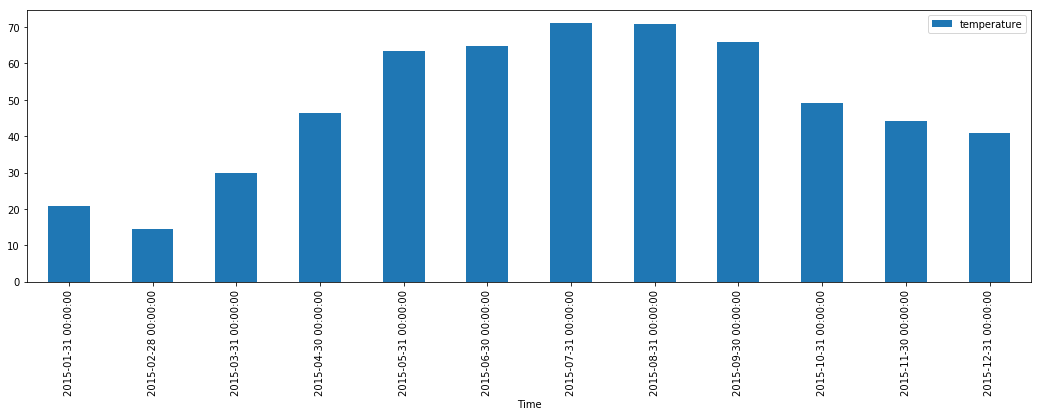

In [5]:
df_M.sort_values(by='temperature').plot(x='temperature',y=['Apartment1','Apartment4'],figsize=(18,5), kind='bar')
df_M.plot(y=['temperature'],figsize=(18,5), kind='bar')

In [15]:
X=['Apt 12','Apt 2','Apt 4','Apt 8','Apt 14','Apt 11','Apt 10','Apt 11','Apt 6','Apt 13']
y=[521.935556,611.798889,1695.028889,1870.095556,2116.653333,2189.25,2294.792222,3073.905556,3306.118889,3361.113333]
z=[2500]*10
#X=X.reshape(-1,-1)
#y=y.flatten()

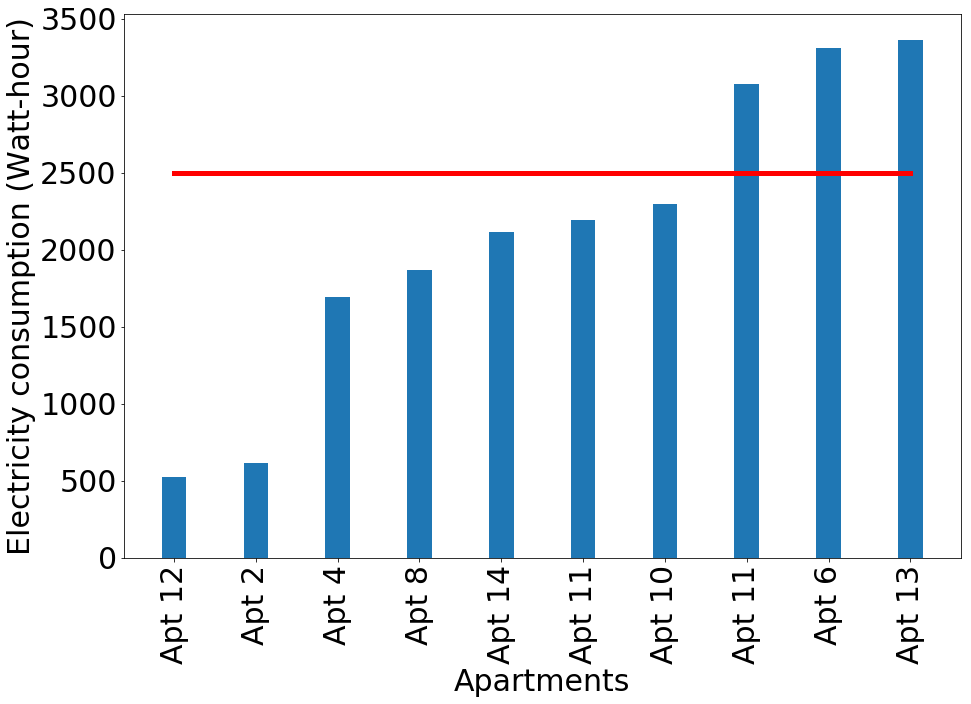

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt


plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size': 30})
plt.xticks(range(len(y)), X, rotation='vertical')
plt.xlabel('Apartments', fontsize=30)



plt.ylabel('Electricity consumption (Watt-hour)', fontsize=30)
plt.bar(range(len(y)), y, 0.3)
plt.plot(range(len(y)), z,'r-', linewidth=5)

plt.savefig('filter.pdf', bbox_inches='tight')
